# Importations

In [166]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time

# Utils

In [128]:
def plot_function(f):
    x_axis = np.linspace(-10, 10, 100).reshape((100, 1))
    y_axis = f(x_axis)
    plt.figure(figsize=(20, 10))
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.grid()
    plt.plot(x_axis, y_axis)
    plt.show()

# Function

In [129]:
def f(x):
    y = x**2
    return y

In [130]:
def df(x):
    y = 2*x
    return y

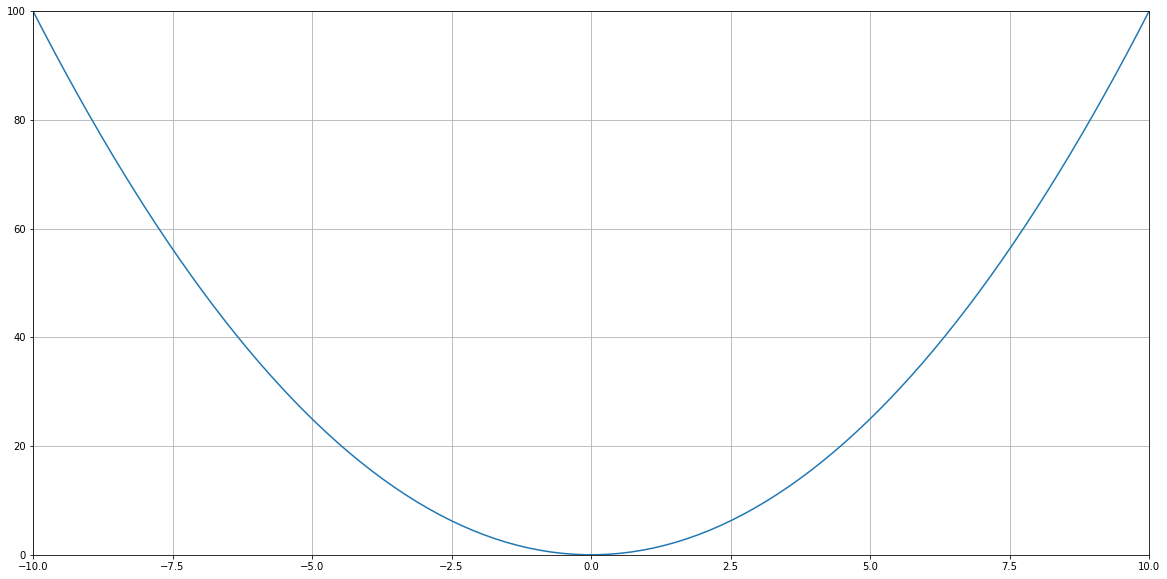

In [131]:
plot_function(f)

# Gradient Descent

Initialization : -6.96599806548035
Time spend : 0.09632110595703125 ms
0.0006925737847241083


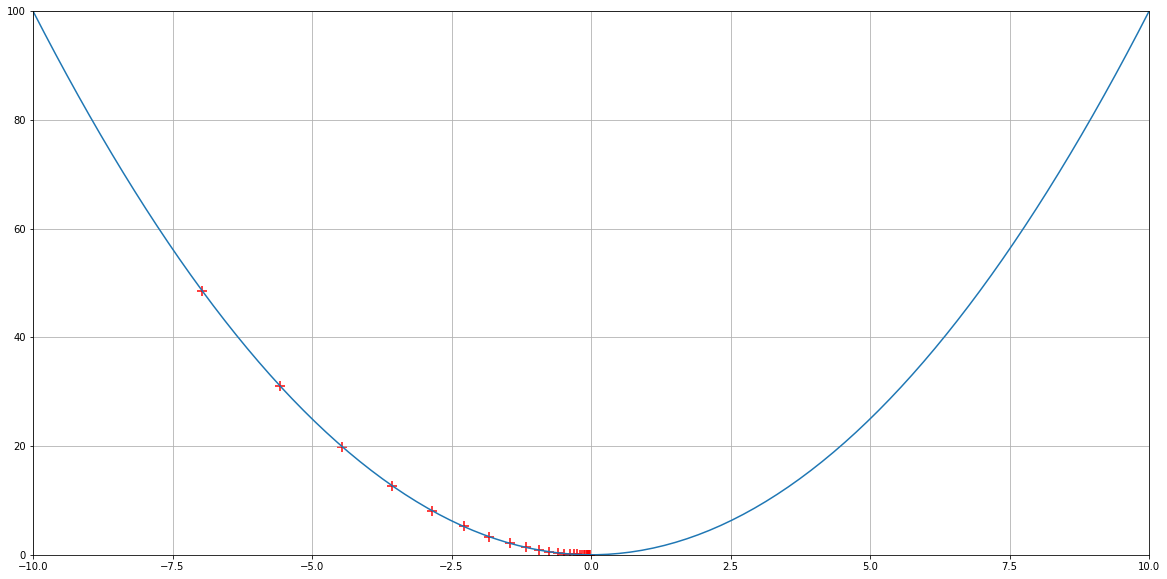

In [182]:
# Learning parameters
nb_epochs = 100
learning_rate = 0.1

# Initialization
x0 = np.random.uniform(-10, 10)
x_list = [x0]
print('Initialization :', x0)

# Gradient descent
start = time.time()
while (f(x0)) > 1e-3:
    dx = df(x0)
    x0 = x0 - learning_rate * dx
    x_list.append(x0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print(f(x0))

# Display result
x_list = np.array(x_list)
plt.figure(figsize=(20, 10))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(0, f(10))
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
x_axis = np.linspace(-10, 10, 100).reshape((100, 1))
y_axis = f(x_axis)
plt.plot(x_axis, y_axis)
plt.show()

# Evolution Strategies

Initialization : -7.213611339906924
Time spend : 56.13255500793457 ms
0.0007418987219675606


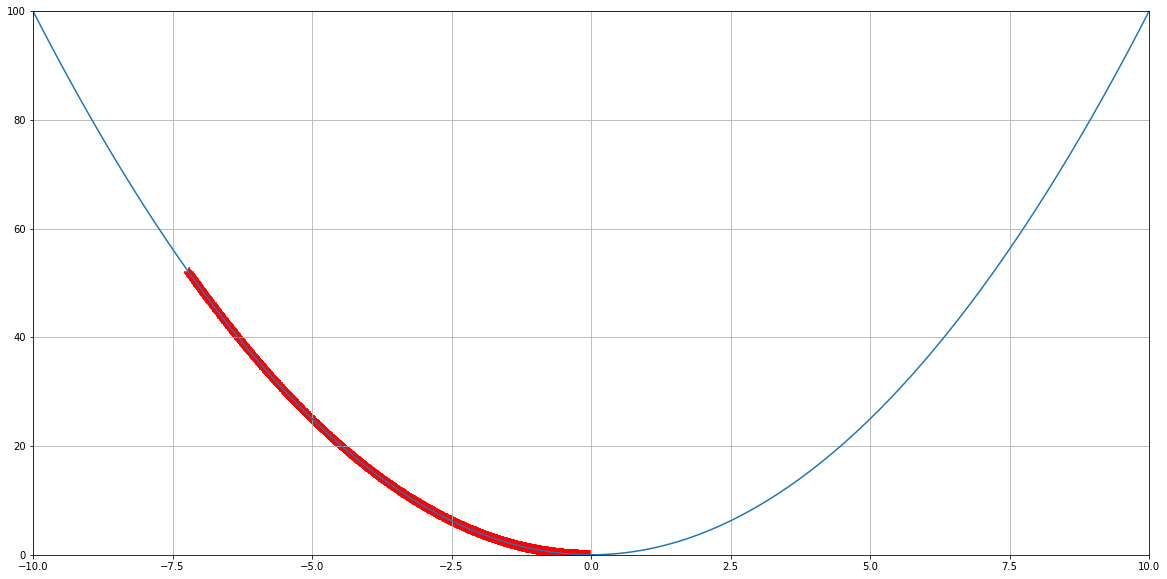

In [184]:
# Learning parameters
nb_pop = 50
sigma = 0.1
alpha = 0.001
nb_epochs = 1000

# Initialization
x0 = np.random.uniform(-10, 10)
x_list = [x0]
print('Initialization :', x0)

# Evolution strategy
start = time.time()
while (f(x0)) > 1e-3:
    # generate population
    N = np.random.randn(nb_pop)
    R = np.zeros(nb_pop)
    for j in range(nb_pop):
        x_try = x0 + sigma * N[j]
        R[j] = f(x_try)
        
    A = (R - np.mean(R)) / np.std(R)
    x0 = x0 - alpha/(nb_pop * sigma) * np.dot(N.T, A)
    x_list.append(x0)
end = time.time()
print('Time spend :', (end - start) * 1000, 'ms')
print(f(x0))
    
# Display result
x_list = np.array(x_list)
plt.figure(figsize=(20, 10))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(0, f(10))
plt.scatter(x_list, f(x_list), s=100, c='r', marker='+')
x_axis = np.linspace(-10, 10, 100).reshape((100, 1))
y_axis = f(x_axis)
plt.plot(x_axis, y_axis)
plt.show()